<a href="https://colab.research.google.com/github/TS0713/Attrition-Analysis/blob/main/Attrition_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center><bold><font color="red" size=13>**Employee Attrition**</font></b></center>

## <font color ="green"> EDA - Employee Attrition Data </font>

- <p><font color="blue">We will try understand various factors causing employee attrition in corporate companies</font></p>
- <p><font color="blue">What are major factors that leading to employee atrrition ?</font></p>
- <p><font color="blue">Does Age, MonthlyIncome, StockOptions, PercentageSalaryHike,TravelPlan .. etc has any effect on employee attrition ?</font></p>
- <p><font color="blue">Does JobSatisfaction, EnvironmentSatisfaction, PerformanceRating, Deparment, JobRole provide any information that causes employees to leave companies ?</font></p>
- <p><font color="blue">Do we have any positive/negative correlation (strong influence) of Various available features over Attrition ?</font></p>
   
### <font color="green">Business Questions </font>
- <p><font color="blue">Does number of years with current manager has some effect or influence over employees for leaving company ?</font></p>
- <p><font color="blue">Does number of years last trained / number of years last promoter / salary hike percentage say anything about employee attrition ?</font></p>
- <p><font color="blue">Does environment/job role/ department play any role that is leading to employee attrition ?</font></p>
- <p><font color="blue">Does employee over time details of each employee from their respective department/job role has to say anything on employee attrition?</font></p>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os 
os.getcwd()
path = "/content/drive/MyDrive/Datasets"
os.chdir(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from ipywidgets import widgets
from ipywidgets import interact
# Visualization libraries
import numpy as np
import seaborn as sns
import pandas as pd 
import plotly as py
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df_org  = df.copy()

### Top 5 rows & Checking Missing values

In [3]:
df.head()
print ("\n")
if not df.isnull().sum().sum() > 0:
    print ("No Missing Values")# no missing values

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2




No Missing Values


### Some statistical measurements for each field present in Dataset

In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Identifying fields having 1 unique value, they can be ignored as they don't provide any info

In [5]:
column_unique_count = pd.DataFrame(df.apply(lambda x: x.unique().shape[0],axis=0),columns=["Count"])
column_unique_count["Field"]=column_unique_count.index.tolist()
column_unique_count.reset_index(drop=True,inplace=True)
column_unique_count.sort_values(["Count"],inplace=True)

print ("Fields that can be ingored: \n\n",column_unique_count.Field[column_unique_count.Count <= 1].tolist(),"\n\n")
print ("Fields that matter: \n\n", column_unique_count.Field[column_unique_count.Count>1].tolist())
#req_fields = column_unique_count_not_1.Field.tolist()

#req_fields
cols_not_required = ['Over18', 'StandardHours', 'EmployeeCount','EmployeeNumber']

# Dropping unecessary Fields
df.drop(['Over18', 'StandardHours', 'EmployeeCount','EmployeeNumber'],axis=1,inplace=True) # 

Fields that can be ingored: 

 ['Over18', 'StandardHours', 'EmployeeCount'] 


Fields that matter: 

 ['Gender', 'Attrition', 'PerformanceRating', 'OverTime', 'MaritalStatus', 'Department', 'BusinessTravel', 'StockOptionLevel', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance', 'Education', 'JobLevel', 'EducationField', 'TrainingTimesLastYear', 'JobRole', 'NumCompaniesWorked', 'PercentSalaryHike', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'YearsInCurrentRole', 'DistanceFromHome', 'YearsAtCompany', 'TotalWorkingYears', 'Age', 'HourlyRate', 'DailyRate', 'MonthlyIncome', 'MonthlyRate', 'EmployeeNumber']


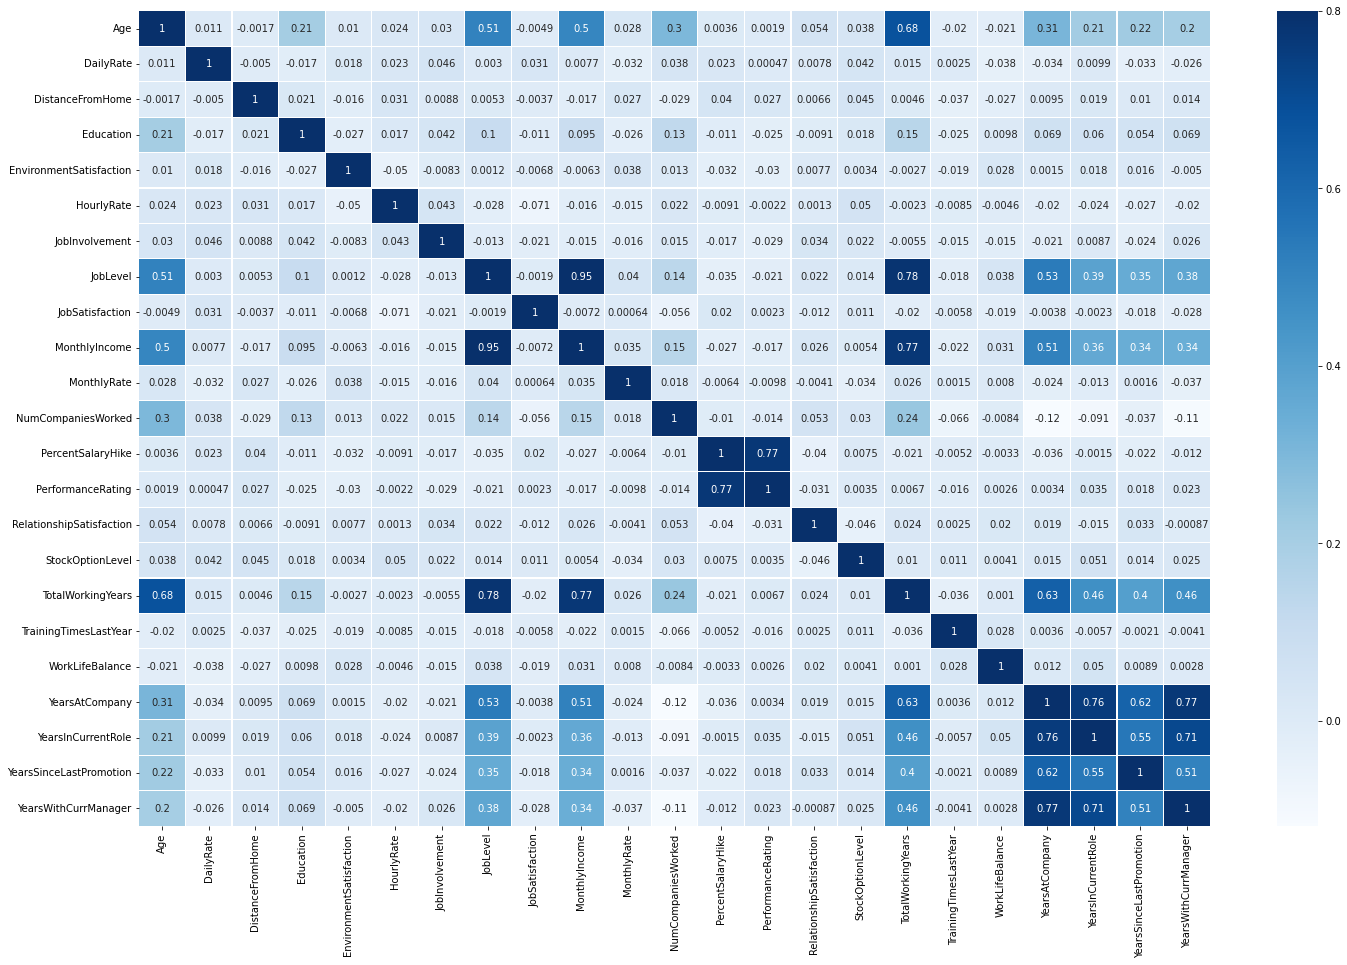

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(24,15))
sns.heatmap(df.corr(),cmap="Blues",vmax=0.8,linewidth=0.1,annot=True)
plt.show();

#### Insights based on above Correlation Heatmap
- Positive Correlation among the following pairs (JobLevel,MonthlyIncome), (TotalWorkingYears and JobLevel), (TotalWorkingYears,MonthlyIncome), (TotalWorkingYears,YearsAtCompany), (TotalWorkingYears,Age), (PerformanceRating, PercentageSalaryHike), (YearsAtCompany,YearsAtCurrentRole), (YearsAtCompany,YearsSinceLastPromotion), (YearsAtCompany,YearsWithCurrManager)

In [7]:
few_categorical_cols = ['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction']

for i in df[few_categorical_cols]:
    df[i].replace({1:'below average', 2:'average',3:'good', 4:'excellent'},
                   inplace = True)
    

# PerformanceRating

for i in df['PerformanceRating']:
    df['PerformanceRating'].replace({1:'below average', 2:'average',3:'good',4:'excellent'},
                                  inplace = True)

# Education
for i in df['Education']:
    df['Education'].replace({1:'Undergraduate',2:'Graduate',3:'Masters',4:'More Degrees', 5:'PHD'},
                       inplace = True)
    

# Work Life Balance
for i in df['WorkLifeBalance']:
    df['WorkLifeBalance'].replace({1: 'below average', 2:'average', 3:'good', 4:'excellent'}, 
                                  inplace = True)


In [8]:
def categorical_pieplot(enter_col,df=df,attrition_value="Yes"):
    #df,names="Attrition", template = 'presentation'
    fig = px.pie(df[df.Attrition==attrition_value], names=enter_col, template = 'presentation',
                      title = f'Attrition({attrition_value}) - {enter_col}')
    fig.update_traces(rotation=90, pull = [0.1], textinfo = "percent+label")
    fig.show()

In [9]:
attrition_value="Yes"
enter_col="MonthlyIncome"
px.histogram(df[df.Attrition==attrition_value], x = enter_col ,nbins=15,template = 'plotly_white',
                      title = f'Attrition({attrition_value}) - {enter_col}')#,facet_col="JobLevel",facet_col_wrap=3)

#### Insight from the above - Distribution of "MonthlyIncome" - Attritioned Employees("Yes")
- We can clearly see that lesser monthly income employees are leaving more in number than the higher salaried emplooyes
- We might have to re structure the salary as per the market standards
- We might have explore further to see its distributions across Age, Department, JobSatisfaction to know more about Attritioned employees

In [10]:
attrition_value="Yes"
enter_col="Age"
px.histogram(df[df.Attrition==attrition_value], x = enter_col ,nbins=15,template = 'plotly_white',
                      title = f'Attrition({attrition_value}) - {enter_col}')#,facet_col="JobLevel",facet_col_wrap=3)

#### Insight from the above - Distribution of "Age" - Attritioned Employees("Yes")
- We see the number of employees with in the age group 20-45 leaving the company are more in number than the rest of the others

In [11]:
attrition_value="Yes"
enter_col="Age"
facet_col="TrainingTimesLastYear"
px.histogram(df[df.Attrition==attrition_value], x = enter_col ,nbins=7,template = 'plotly_white',
                      title = f'Attrition({attrition_value}) - {enter_col}',facet_col=facet_col,facet_col_wrap=2,color=facet_col)

In [12]:
attrition_value="Yes"
enter_col="Age"
facet_col="JobSatisfaction"
px.histogram(df[df.Attrition==attrition_value], x = enter_col ,nbins=7,template = 'plotly_white',
                      title = f'Attrition({attrition_value}) - {enter_col}',facet_col=facet_col,facet_col_wrap=2,color=facet_col)

In [13]:
attrition_value="Yes"
enter_col="MonthlyIncome"
facet_col="Department"
px.histogram(df[df.Attrition==attrition_value], x = enter_col ,nbins=12,template = 'plotly_white',
                      title = f'Attrition({attrition_value}) - {enter_col} over {facet_col}',facet_col=facet_col,facet_col_wrap=2,color=facet_col)

#### Insight from the above - Distribution of "MonthlyIncome" over each Department - Attritioned Employees("Yes")
- We see more employees leaving "Research & Development" Department are of lesser salary and same is with "Sales" Department
- Also for "Human Resources" Department, we see more employees who have left falls under lesser salaried group
- HR has to look into it and take necessary steps to retain them with company

In [14]:
attrition_value="Yes"
enter_col="MonthlyIncome"
facet_col="JobSatisfaction"
px.histogram(df[df.Attrition==attrition_value], x = enter_col ,nbins=12,template = 'plotly_white',
                      title = f'Attrition({attrition_value}) - {enter_col} over {facet_col}',facet_col=facet_col,facet_col_wrap=2,color=facet_col)

#### Insight from the above - Distribution of "MonthlyIncome" over JobSatisfaction - Attritioned Employees("Yes")
- For all the different "JobSatisfaction" categories, employees with lesser monthly income are leaving company when compared with higher salaried employees
- Lets further understand MonthlyIncome distribution over employee Performance

In [15]:
attrition_value="Yes"
enter_col="MonthlyIncome"
facet_col="EnvironmentSatisfaction"
px.histogram(df[df.Attrition==attrition_value], x = enter_col ,nbins=12,template = 'plotly_white',
                      title = f'Attrition({attrition_value}) - {enter_col} over {facet_col}',facet_col=facet_col,facet_col_wrap=2,color=facet_col)

#### Insight from the above - Distribution of "MonthlyIncome" over EnvironmentSatisfaction - Attritioned Employees("Yes")
- For all the different "EnvironmentSatisfaction" categories, employees with lesser monthly income are leaving company when compared with higher salaried employees
- We have to check their Work Environments to further understand what make the employees leave company

In [16]:
attrition_value="Yes"
enter_col="MonthlyIncome"
facet_col="PerformanceRating"
px.histogram(df[df.Attrition==attrition_value], x = enter_col ,nbins=12,template = 'plotly_white',
                      title = f'Attrition({attrition_value}) - {enter_col} over {facet_col}',facet_col=facet_col,facet_col_wrap=2,color=facet_col)

#### Insight from the above - Distribution of "MonthlyIncome" over PerformanceRating - Attritioned Employees("Yes")
- In both cases of Performance ("good", "excellent"), employees with lesser salaries are leaving more in number than the ones having higher salaries.
- Its sad to see employees who are rated "excellent" leaving the company
- HR has to conduct one on one meeting with employees 

In [17]:
categorical_pieplot('JobSatisfaction');

#### Insight from above Pie Chart - JobSatisfaction over Attritioned employees
- Total % of employees fall under "below average" & "average" - 47.2%
- Total % of employees fall under "excellent" & "good" - 52.7%
- We need to further explore the factors on why are employees, especially the ones leaving who are happy with their jobs

<Figure size 1728x1080 with 0 Axes>

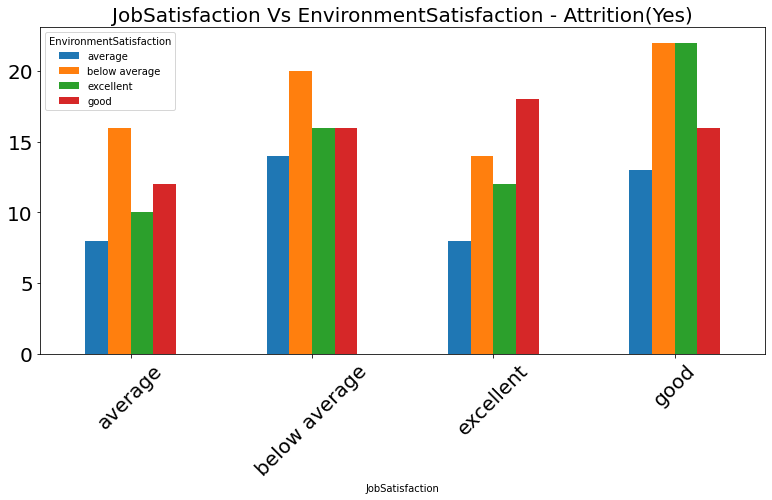

In [18]:
plt.figure(figsize=(24,15))
(pd.crosstab(df.loc[df.Attrition=="Yes","JobSatisfaction"],df.loc[df.Attrition=="Yes","EnvironmentSatisfaction"])).plot(fontsize=20,rot=45,figsize=(13,6),kind="bar");
plt.title("JobSatisfaction Vs EnvironmentSatisfaction - Attrition(Yes)",fontsize=20)
plt.show();

#### Insight from the above barplot - JobSatisfaction Vs EnvironmentSatisfaction - Attrition(Yes)
- If we consider the JobSatisfaction("average","below average","good"), majority of the employees did not like the environment
- If we consider the JobStatisfaction("good"), majority of the employees who are satisfied with environment are leaving the company, we have further check what made them to do

In [19]:
attrition_value="Yes"
enter_col="PercentSalaryHike"
facet_col="JobLevel"
px.histogram(df[df.Attrition==attrition_value], x = enter_col ,nbins=2,template = 'plotly_white',
                      title = f'Attrition({attrition_value}) - {enter_col} over {facet_col}',facet_col=facet_col,facet_col_wrap=3,color=facet_col)

#### Insight from the above - Distribution of "SalaryHike" over each category of "JobLevel" - Attritioned Employees("Yes")
- From all the distributions above - we clearly see that more people leaving company because of less salary hike
- We have to take necessary steps to stop the above trend

In [20]:
attrition_value="Yes"
enter_col="PercentSalaryHike"
facet_col="Education"
px.histogram(df[df.Attrition==attrition_value], x = enter_col ,nbins=2,template = 'plotly_white',
                      title = f'Attrition({attrition_value}) - {enter_col} over {facet_col}',facet_col=facet_col,facet_col_wrap=3,color=facet_col)

#### Insight from the above - Distribution of "SalaryHike" over each category of "Education" - Attritioned Employees("Yes")
- For ease of understanding I have assigned categorical labels to "Education" field as below 
#### 1 as 'Undergraduate' 2 as 'Graduate' 3 as 'Masters' 4 as 'More Degrees' 5 as 'PHD'
- We see that more employees are leaving because of less salary hike across all but majorly in "Education" = 3 (Masters)
- We either have to look for salary hike or other alternatives to make employees stay back in the company

In [21]:
attrition_value="Yes"
enter_col="TrainingTimesLastYear"
facet_col="JobLevel"
px.histogram(df[df.Attrition==attrition_value], x = enter_col ,nbins=12,template = 'plotly_white',
                      title = f'Attrition({attrition_value}) - {enter_col} over {facet_col}',facet_col=facet_col,facet_col_wrap=3,color=facet_col)

#### Insight from the above distribution of TrainingTimesLastYear over each JobLevel - Attritioned employees
- If we provide more trainings to the employees, chances are more that employee will stay with company

In [22]:
attrition_value="Yes"
enter_col="TrainingTimesLastYear"
facet_col="Department"
px.histogram(df[df.Attrition==attrition_value], x = enter_col ,nbins=12,template = 'plotly_white',
                      title = f'Attrition({attrition_value}) - {enter_col} over {facet_col}',facet_col=facet_col,facet_col_wrap=3,color=facet_col)

#### Insight from the above distribution of TrainingTimesLastYear over each Department - Attritioned employees
- If we provide more trainings to the employees especially for employees from "Sales" and "Research & Development" Departments, chances are more likely that employees from these departments will stay 

In [23]:
attrition_value="Yes"
enter_col="PercentSalaryHike"
facet_col="Department"
px.histogram(df[df.Attrition==attrition_value], x = enter_col ,nbins=13,template = 'plotly_white',
                      title = f'Attrition({attrition_value}) - {enter_col} over {facet_col}',facet_col=facet_col,facet_col_wrap=3,color=facet_col)

#### Insight from the above distribution of PercentSalaryHike over each Department - Attritioned employees
- We clearly see that employees from Department "Sales" and "Research & Development" are leaving more in number are having less salary hikes
- We have to necessary steps again to stop the above trend

<Figure size 1728x1080 with 0 Axes>

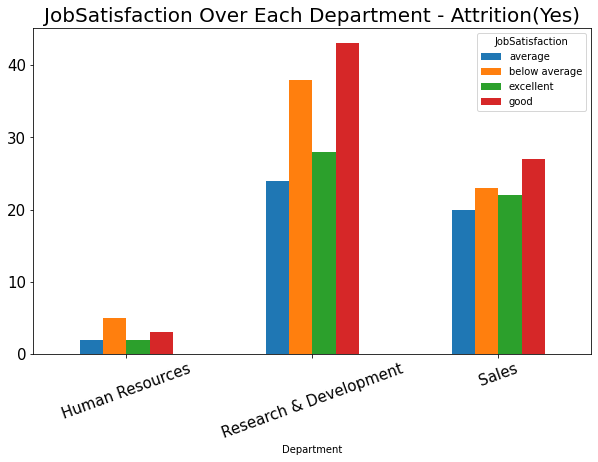

In [24]:
plt.figure(figsize=(24,15))
(pd.crosstab(df.loc[df.Attrition=="Yes","Department"],df.loc[df.Attrition=="Yes","JobSatisfaction"])).plot(fontsize=15,rot=20,figsize=(10,6),kind="bar");
plt.title("JobSatisfaction Over Each Department - Attrition(Yes)",fontsize=20)
plt.show();

#### Insight from the above barplot - JobSatisfaction Over Department - Attrition(Yes)
- If we club together the employees who expressed their JobSatisfaction as - "below average","average","good" as they are accounting more in number than the ones who are having excellent JobSatisfaction and it is observed across all the 3 departments but more in "Research & Development" and "Sales".
- I suggest HR and respective team managers has to conduct meetings on regular basis to gather opinions from employees especially from "Research & Development" and "Sales" Departments and take necessary steps to stop the above trend.

In [25]:
attrition_value="Yes"
enter_col="YearsWithCurrManager"
#facet_col="JobSatisfaction"
px.histogram(df[df.Attrition==attrition_value], x = enter_col ,nbins=13,template = 'plotly_white',
                      title = f'Attrition({attrition_value}) - {enter_col} over {facet_col}')#,facet_col=facet_col,facet_col_wrap=3,color="Department")

#### Insight from the above distribution of YearsWithCurrManager - Attritioned employees
- We see that more number of employees who have left the company had spent lesser time based on "YearsWithCurrManager"
- Lets further explore its distribution based on "JobSatisfaction" to understand what could reason behind it

In [26]:
attrition_value="Yes"
enter_col="YearsWithCurrManager"
facet_col="JobSatisfaction"
px.histogram(df[df.Attrition==attrition_value], x = enter_col ,nbins=13,template = 'plotly_white',
                      title = f'Attrition({attrition_value}) - {enter_col} over {facet_col}',facet_col=facet_col,facet_col_wrap=3,color=facet_col)

#### Insight from the above distribution of YearsWithCurrManager over JobSatisfaction - Attritioned employees
- From the above distributions of "YearsWithCurrManager" over "JobSatisfaction" we can clearly see that number of employees who have spent lesser time with Current Manager are more in number
- We need to look into to understand better on this situation

In [27]:
attrition_value="Yes"
dim1="Department"
dim2="JobRole"

fig = px.parallel_categories(df[df.Attrition==attrition_value],dimensions=[dim1,dim2],title = f'Attrition({attrition_value}) - {dim1} <=> {dim2}')
fig.show() 

#### Insight - Based on Parallel Categories Plot between Department & JobRol over Attritioned Employees
- We see that most the employees who left are from "Research & Development" and "Sales" Departments
and most them are working in Job Roles as "Sales Executive", "Laboratory Tehcnician", "Sales Representative", "Research Scientist"
- I suggest HR should look into employees who work in above mentioned Job Roles and from Department as mentioned above t

In [28]:
attrition_value="Yes"
enter_col="YearsInCurrentRole"
facet_col="JobSatisfaction"
px.histogram(df[df.Attrition==attrition_value], x = enter_col ,nbins=12,template = 'plotly_white',
                      title = f'Attrition({attrition_value}) - {enter_col} over {facet_col}',facet_col=facet_col,facet_col_wrap=2,color=facet_col)


#### Insight from the above distribution of YearsInCurrentRole over JobSatisfaction - Attritioned employees
- From the above distribution of YearsInCurrentRole, we can say that the number of employees who left have spent less time in CurrentRole and it is observed over all the categories of JobSatisfaction
- It could have happened when employees are evaluated properly before they put into current role (possible reason)
- Employees coud not pick up properly with current assigned role (possible reason), even though they have expressed positively with Job

In [29]:
attrition_value="Yes"
enter_col="YearsInCurrentRole"
facet_col="PerformanceRating"
px.histogram(df[df.Attrition==attrition_value], x = enter_col ,nbins=12,template = 'plotly_white',
                      title = f'Attrition({attrition_value}) - {enter_col} over {facet_col}',facet_col=facet_col,facet_col_wrap=2,color=facet_col)


#### Insight from the above distribution of YearsInCurrentRole over PerformanceRating - Attritioned employees
- It would be nice if the employee PerformanceRating is categories into atleast 4 categories, if provided it will help us better to understand what causing employee Attrition better
- From the above distribution, the number of employees who have spent less years in current role leaving company are more in number for both categories PerformanceRating
- Either employees are not performing well or employees are not evaluated properly before they were assigned with current role or employees not satisfied after his role has been assigned

In [30]:
attrition_value="Yes"
enter_col="YearsInCurrentRole"
facet_col="JobRole"
px.histogram(df[df.Attrition==attrition_value], x = enter_col ,nbins=8,template = 'plotly_white',
                      title = f'Attrition({attrition_value}) - {enter_col} over {facet_col}',facet_col=facet_col,facet_col_wrap=2,color=facet_col)


#### Insight from the above distribution of YearsInCurrentRole over PerformanceRating - Attritioned employees
- From the above distributions, we can clearly see that Attritioned employees from JobRole "Laboratory Technician", "Sales Executive", "Research Director" and "Human Resources" are more in number who have spent less years in their current JobRole


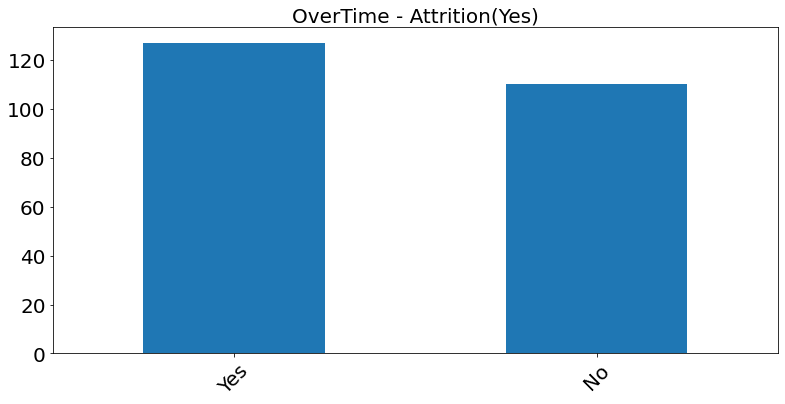

In [31]:
plt.figure(figsize=(15,8))
df.loc[df.Attrition=="Yes","OverTime"].value_counts().plot(fontsize=20,rot=45,figsize=(13,6),kind="bar")
plt.title("OverTime - Attrition(Yes)",fontsize=20)
plt.show();

#### Insight - From the above barplot
- The most of the Attritioned employees are the ones doing overtime
- We have to look further to check which JobRole employees are doing overtime 

<Figure size 1728x1080 with 0 Axes>

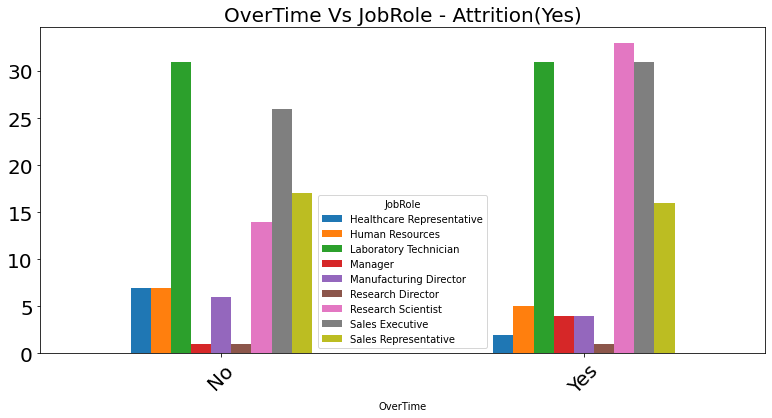

In [32]:
plt.figure(figsize=(24,15))
(pd.crosstab(df.loc[df.Attrition=="Yes","OverTime"],df.loc[df.Attrition=="Yes","JobRole"])).plot(fontsize=20,rot=45,figsize=(13,6),kind="bar");
plt.title("OverTime Vs JobRole - Attrition(Yes)",fontsize=20)
plt.show();

#### Insight - From the above barplot OverTime over JobRole - Attritioned Employees
- The employees from the JobRole "Laboratory Technician" are leaving more in number irrespective of "OverTime"
- We see there are more employees from JobRoles - {"Research Scientist", "Sales Executive", "Sales Representative"} who are doing "OverTime" are leaving the company 

<Figure size 1728x1080 with 0 Axes>

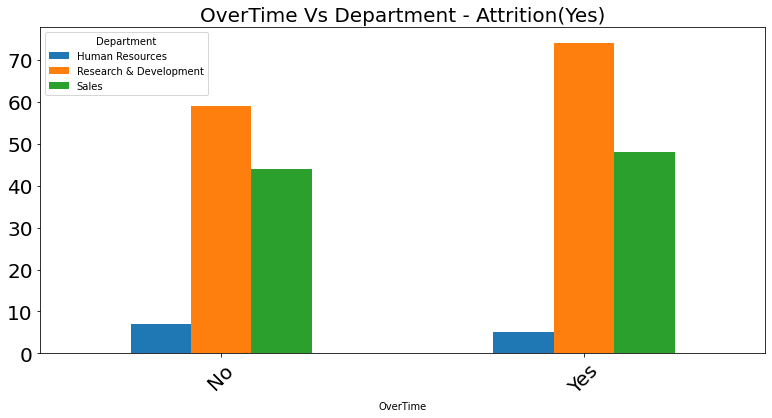

In [33]:
plt.figure(figsize=(24,15))
(pd.crosstab(df.loc[df.Attrition=="Yes","OverTime"],df.loc[df.Attrition=="Yes","Department"])).plot(fontsize=20,rot=45,figsize=(13,6),kind="bar");
plt.title("OverTime Vs Department - Attrition(Yes)",fontsize=20)
plt.show();

#### Insight - From the above Barplot  OverTime over Each Department - Attritioned employees
- We see that more employees leaving the company are from Departments - {"Research & Development" and "Sales"} are the ones doing "OverTime"

In [34]:
attrition_value="Yes"
enter_col="TotalWorkingYears"
facet_col="Department"
px.histogram(df[df.Attrition==attrition_value], x = enter_col ,nbins=13,template = 'plotly_white',
                      title = f'Attrition({attrition_value}) - {enter_col} over {facet_col}',facet_col=facet_col,facet_col_wrap=3,color=facet_col)

#### Insight - From the Distribution of TotalWorkingYears over Deparment - Attritioned Employees
- Most of the employees who left the company are the ones spent less Total Working Years especially from "Sales" and "Research & Development" Departments

In [35]:
attrition_value="Yes"
enter_col="YearsSinceLastPromotion"
facet_col="PerformanceRating"
px.histogram(df[df.Attrition==attrition_value], x = enter_col ,nbins=8,template = 'plotly_white',
                      title = f'Attrition({attrition_value}) - {enter_col} over {facet_col}',facet_col=facet_col,facet_col_wrap=2,color=facet_col)


<Figure size 1728x1080 with 0 Axes>

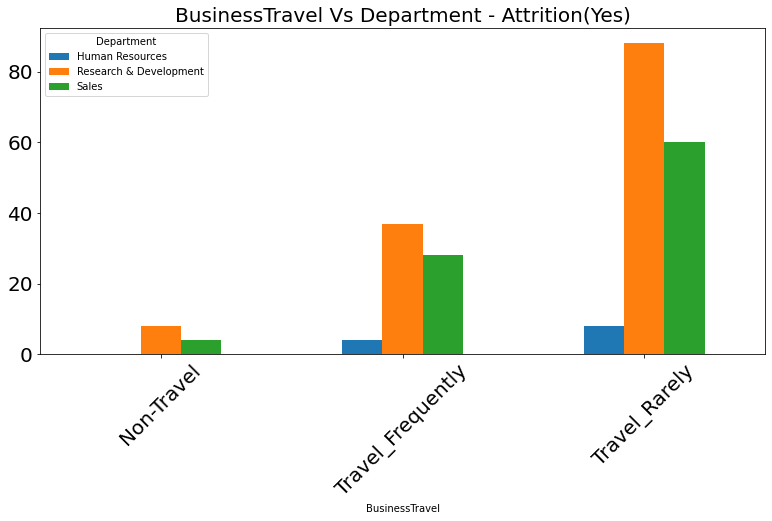

In [36]:
plt.figure(figsize=(24,15))
(pd.crosstab(df.loc[df.Attrition=="Yes","BusinessTravel"],df.loc[df.Attrition=="Yes","Department"])).plot(fontsize=20,rot=45,figsize=(13,6),kind="bar");
plt.title("BusinessTravel Vs Department - Attrition(Yes)",fontsize=20)
plt.show();

#### From the above Barplot - Business Travel over Department - Attritioned Employees(Yes)
- We see that the number of employees from Departments "Research & Development" and "Sales" who have travelled rarely have left more in number than the ones who travelled frequently
- We might have to look into travel options for employees expecially from above mentioned Departments

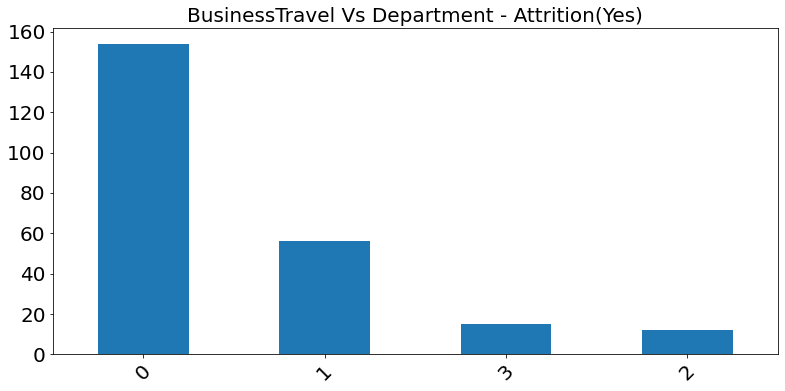

In [37]:

df.loc[df.Attrition=="Yes","StockOptionLevel"].value_counts().plot(fontsize=20,rot=45,figsize=(13,6),kind="bar");
plt.title("BusinessTravel Vs Department - Attrition(Yes)",fontsize=20)
plt.show();

#### Insight - From the above barplot of StockOptionLevel - Attritioned Employees
- Stock option can actually help company to retain their employees

In [38]:
attrition_value="Yes"
enter_col="YearsAtCompany"
facet_col="StockOptionLevel"
px.histogram(df[df.Attrition==attrition_value], x = enter_col ,nbins=5,template = 'plotly_white',
                      title = f'Attrition({attrition_value}) - {enter_col} over {facet_col}',facet_col=facet_col,facet_col_wrap=2,color=facet_col)


#### Insight - From the above distribution of YearsAtCompany over StockOptions
- Chances are less if the stock options are given to those employees who stayed for longer time in company
- Carefully choosing employees and offering them stockoptions will have less chances for the employee to leave company

In [39]:
#encoding binary variables
model_data = df_org.copy()
model_data['Attrition'] = model_data['Attrition'].replace({'No':0,'Yes':1})
model_data['OverTime'] = model_data['OverTime'].map({'No':0,'Yes':1})
model_data['Gender'] = model_data['Gender'].map({'Male':0,'Female':1})

#encoding categorical columns which are ordinal, use labelEncoding
cat_cols = ['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']
for col in cat_cols:
    map_dict = {k:i for i, k in enumerate(model_data[col].value_counts().index,0)}
    model_data[col] = model_data[col].map(map_dict)

# Dropping unecessary Fields
model_data.drop(['Over18', 'StandardHours', 'EmployeeCount','EmployeeNumber'],axis=1,inplace=True)

In [40]:
model_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0,1102,1,1,2,0,2,1,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,0,8,1,0,3,0,...,4,4,1,10,3,3,10,7,1,7
2,37,1,0,1373,0,2,2,4,4,0,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,0,3,4,0,4,1,...,3,3,0,8,3,3,8,7,3,0
4,27,0,0,591,0,2,1,1,1,0,...,3,4,1,6,3,3,2,2,2,2


In [41]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score,recall_score,roc_curve, auc


def model_training_stats(model,X_train,X_test,Y_test,Y_train,BestFit="No"):
    
    if BestFit=="No":
        model.fit(X_train,Y_train,400)
    else:
        model=model
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    print (f"Train_Accuracy: {round(accuracy_score(Y_train,Y_train_pred)*100,4)}")
    print (f"Test_Accuracy: {round(accuracy_score(Y_test,Y_test_pred)*100,4)}")
    print (f"Test_Precision: {round(precision_score(Y_test,Y_test_pred)*100,4)}")
    print (f"Test_Recall: {round(recall_score(Y_test,Y_test_pred)*100,4)}")
    return model



def ROC_Curve(model,X_test,Y_test):
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test, y_score)
    
    df = pd.DataFrame({
        'False Positive Rate': fpr,
        'True Positive Rate': tpr
    }, index=thresholds)
    df.index.name = "Thresholds"
    df.columns.name = "Rate"

    fig_thresh = px.line(
        df, title='TPR and FPR at every threshold',
        width=700, height=500
    )

    fig_thresh.update_yaxes(scaleanchor="x", scaleratio=1)
    fig_thresh.update_xaxes(range=[0, 1], constrain='domain')
    fig_thresh.show()

In [42]:
rf_model = RandomForestClassifier(300)
rf_model.fit(model_data.drop(["Attrition"],axis=1),model_data["Attrition"])
feature_importance = pd.DataFrame(columns=["Features","Importance"])
feature_importance["Features"] = model_data.drop(["Attrition"],axis=1).columns.tolist()
feature_importance["Importance"] = rf_model.feature_importances_  
feature_importance.sort_values("Importance",ascending=False,inplace=True)
fig = px.bar(feature_importance.head(20), x = 'Importance',y='Features', orientation='h',color="Features")
fig.update_layout(yaxis={'categoryorder':'total ascending'})

RandomForestClassifier(n_estimators=300)

#### Insight - From the above Feature Importance Plot
- We see that "MonthlyIncome", "Age", "DailyRate", "OverTime", "MonthlyRate", "TotalWorkingYears" are top features which can help us to classify if an emplooye is leaving the company
- Accordingly HR can take necessary steps in order to retain the employees not leaving the company

In [43]:
min_max_scaler = MinMaxScaler()
rf_model_scaled = RandomForestClassifier(300)
scaled_data = min_max_scaler.fit_transform(model_data.drop(["Attrition"],axis=1))
rf_model_scaled.fit(scaled_data,model_data["Attrition"])
feature_importance_scaled = pd.DataFrame(columns=["Features","Importance"])
feature_importance_scaled["Features"] = model_data.drop(["Attrition"],axis=1).columns.tolist()
feature_importance_scaled["Importance"] = rf_model_scaled.feature_importances_  
feature_importance_scaled.sort_values("Importance",ascending=False,inplace=True)
fig = px.bar(feature_importance_scaled.head(20), x = 'Importance',y='Features', orientation='h',color="Features")
fig.update_layout(yaxis={'categoryorder':'total ascending'})

RandomForestClassifier(n_estimators=300)

#### Insight - From the above Feature Importance Plot 
- After re-scaling and fitting model with scaled features, it is still showing same features in top 20 list like the previous one where we have done model training on original features


In [44]:
X_train,X_test,Y_train,Y_test = train_test_split(model_data.drop(["Attrition"],axis=1),
                                                 model_data["Attrition"],
                                                 test_size=0.25,random_state=42)

X_train_scaled,X_test_scaled,Y_train,Y_test = train_test_split(min_max_scaler.fit_transform(model_data.drop(["Attrition"],axis=1)),
                                                 model_data["Attrition"],
                                                 test_size=0.25,random_state=42)

RF_Classifier = RandomForestClassifier()


#### Training RandomForest Classifier with Original Features

In [45]:
RF_model = model_training_stats(RF_Classifier,X_train,X_test,Y_test,Y_train,BestFit="No")
ROC_Curve(RF_model,X_test,Y_test)

Train_Accuracy: 100.0
Test_Accuracy: 87.2283
Test_Precision: 55.5556
Test_Recall: 10.4167


#### Training RandomForest Classifier with Scaled Features

In [46]:
RF_model_scaled = model_training_stats(RF_Classifier,X_train=X_train_scaled,X_test=X_test_scaled,Y_test=Y_test,Y_train=Y_train)
ROC_Curve(RF_model_scaled,X_test_scaled,Y_test)

Train_Accuracy: 100.0
Test_Accuracy: 87.2283
Test_Precision: 57.1429
Test_Recall: 8.3333


#### Hyperparameter Tuning on Scaled Features - RandomForest Classifier

In [47]:
# Number of Trees in Forest
n_estimators = [int(x) for x in np.linspace(100,1000,10)]

# Max Depth of Tree
max_depth = [int(x) for x in np.linspace(5,25,5)]

# Splitting Criteria
criterion = ['entropy','gini']

# Minimum Number of Samples considers at Internal Node for Splitting
min_samples_split = [2,4,5,7,8,10]

# Minimum Number of nodes at Leaf Node
min_samples_leaf = [2,4,5,7,8]

# Number of Features to be considered when applying the Best Fit Model
max_features = ["auto","sqrt"]

Random_Grid = dict(n_estimators=n_estimators, max_depth=max_depth, criterion=criterion,
                  min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,
                   max_features=max_features)

for i in Random_Grid.keys():
    print (i,": ", Random_Grid[i])
    

n_estimators :  [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
max_depth :  [5, 10, 15, 20, 25]
criterion :  ['entropy', 'gini']
min_samples_split :  [2, 4, 5, 7, 8, 10]
min_samples_leaf :  [2, 4, 5, 7, 8]
max_features :  ['auto', 'sqrt']


In [48]:
RF_RandomGrid = RandomizedSearchCV(RF_Classifier, param_distributions=Random_Grid, cv=5, n_iter=10,
                               random_state=42, n_jobs=-1,verbose=1,)

RF_RandomGrid.fit(X_train_scaled, Y_train)
print ("\n\n")
print("Best Score: \n",RF_RandomGrid.best_score_)
print("Best Params: \n",RF_RandomGrid.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [5, 10, 15, 20, 25],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [2, 4, 5, 7, 8],
                                        'min_samples_split': [2, 4, 5, 7, 8,
                                                              10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, verbose=1)




Best Score: 
 0.8538996297819829
Best Params: 
 {'n_estimators': 200, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'gini'}


In [49]:
RF_Random_Grid = model_training_stats(RF_RandomGrid.best_estimator_,X_train=X_train_scaled,X_test=X_test_scaled,Y_test=Y_test,Y_train=Y_train,BestFit="Yes")
ROC_Curve(RF_Random_Grid,X_test_scaled,Y_test)

Train_Accuracy: 91.6515
Test_Accuracy: 87.5
Test_Precision: 62.5
Test_Recall: 10.4167


#### Randomized Grid Search Hyperparameter Tuning for XGB Classifier

In [50]:
n_estimators = [int(x) for x in np.linspace(100,1000,10)]

max_depth = [int(x) for x in np.linspace(5,25,5)]
learning_rate = [0.001,0.002,0.003,0.004,0.005,0.006,0.01]
min_child_weight = list(range(1,10))
XGB_GridSearch_Params = dict(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, 
               min_child_weight=min_child_weight)
for i in XGB_GridSearch_Params.keys():
    print (i,": ", XGB_GridSearch_Params[i])
    

n_estimators :  [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
max_depth :  [5, 10, 15, 20, 25]
learning_rate :  [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.01]
min_child_weight :  [1, 2, 3, 4, 5, 6, 7, 8, 9]


In [51]:
XGB_Classifier = XGBClassifier()
XGB_RandomGrid = RandomizedSearchCV(XGB_Classifier, param_distributions=XGB_GridSearch_Params, cv=5, random_state=42,
                               n_iter=10,scoring="accuracy",n_jobs=-1,verbose=1)

XGB_RandomGrid.fit(X_train_scaled, Y_train)

print ("\n\n")
print("Best Score: \n",XGB_RandomGrid.best_score_)
print("Best Params: \n",XGB_RandomGrid.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.002, 0.003,
                                                          0.004, 0.005, 0.006,
                                                          0.01],
                                        'max_depth': [5, 10, 15, 20, 25],
                                        'min_child_weight': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, scoring='accuracy', verbose=1)




Best Score: 
 0.8593212669683258
Best Params: 
 {'n_estimators': 900, 'min_child_weight': 7, 'max_depth': 20, 'learning_rate': 0.003}


In [52]:
XGB_Random_Grid = model_training_stats(XGB_RandomGrid.best_estimator_,X_train=X_train_scaled,X_test=X_test_scaled,Y_test=Y_test,Y_train=Y_train,BestFit="Yes")
ROC_Curve(XGB_Random_Grid,X_test_scaled,Y_test)

Train_Accuracy: 90.6534
Test_Accuracy: 85.3261
Test_Precision: 25.0
Test_Recall: 6.25
